# When will we see BOE? (45pt)

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import statsmodels.formula.api as smf
import seaborn as sns

    1. (5pt) Load the data. Only keep the northern hemisphere data. Remove all missing extents–we will only work with extent below.
    Note: make sure you understand how missings are coded! There are missings in data.

In [2]:
# Load the orginal dataset
boe_df = pd.read_csv('/home/jovyan/PS/data/ice-extent.csv', sep='\t')
# Filter out any rows that do not have the northern region
north_ice_df = boe_df[boe_df.region == 'N']
# Remove missing extents/negative extent
north_ice_df = north_ice_df[north_ice_df.extent >= 0]
# Report the basic shape
print('Number of rows in the dataset:', north_ice_df.shape[0])
print('Number of columns in the dataset:', north_ice_df.shape[1])
# Display the first five lines
north_ice_df.head(5)

Number of rows in the dataset: 517
Number of columns in the dataset: 7


,year,month,data-type,region,extent,area,time
0,1978,11,Goddard,N,11.65,9.04,1978.875000
2,1978,12,Goddard,N,13.67,10.90,1978.958333
4,1979,1,Goddard,N,15.41,12.41,1979.041667
6,1979,2,Goddard,N,16.18,13.18,1979.125000
8,1979,3,Goddard,N,16.34,13.21,1979.208333


    2. (6pt) Make a plot where you show the September, December and March ice extent over years.
    Note: you may consider seaborn library in addition to matplotlib if you want ready-made functionality for data plotting. But you can also use plt.plot.

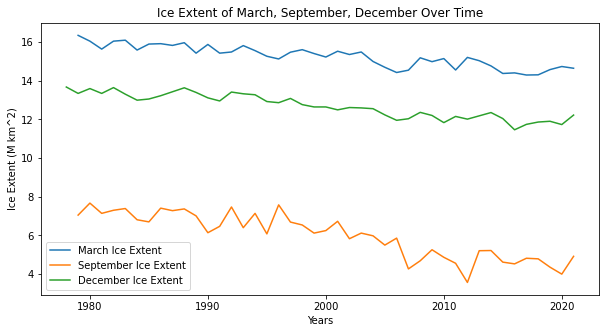

In [3]:
# Create three different dataframes containing months March, September, and December
mar_ice = north_ice_df[north_ice_df.month == 3]
sep_ice = north_ice_df[north_ice_df.month == 9]
dec_ice = north_ice_df[north_ice_df.month == 12]
# Plot the ice extent over years
extent_yearly = plt.rcParams["figure.figsize"] = (10, 5)
extent_yearly = plt.plot(mar_ice.year, mar_ice.extent, label = 'March Ice Extent')
extent_yearly = plt.plot(sep_ice.year, sep_ice.extent, label = 'September Ice Extent')
extent_yearly = plt.plot(dec_ice.year, dec_ice.extent, label = 'December Ice Extent')
extent_yearly = plt.xlabel('Years')
extent_yearly = plt.ylabel('Ice Extent (M km^2)')
extent_yearly = plt.title('Ice Extent of March, September, December Over Time')
extent_yearly = plt.legend()
extent_yearly = plt.show()

    3. (5pt) Estimate a linear regression model for September data where you describe the sea ice extent as a function of years.
    Note: in terms of interpeting the coefficients below, I recommend to use years relative to 2000, i.e. 1999 =−1, 2000 =0, 2001 =1 etc.

In [4]:
# Create a copy to avoid warning
sep_ice = sep_ice.copy()
# Create the years to make them relative to 2000
sep_ice['relative_year'] = sep_ice.year - 2000
# Estimate a linear regression model for September data
regression_sep = smf.ols("extent ~ relative_year", data = sep_ice).fit()
print(regression_sep.summary())

                            OLS Regression Results                            
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.25e-15
Time:                        18:52:39   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9935      0.080     74.629

    4. (5pt) Interpret the coefficients. What does intercept mean? How big is yearly effect? Is it statistically significant? What about slope? What does it mean?

$\beta_0$ is 5.9935 and $\beta_1$ is -0.0812. The intercept means that in September of the year 2000, the extent is estimated to be 5.9935 M $km^2$, and the yearly effect (slope) means that as the year increases by one, the extent decreases 0.0812 M $km^2$. Since the p-value for both groups is 0.000, which is smaller than a typical alpha value (i.e., 0.05), this is statistically significant.

    5. (2pt) What does the intercept mean if
    (a) you use years as is (1999, 2000, 2001, . . . )?
    (b) you use years relative to 2000 (-1, 0, 1, . . . )?

In [5]:
# Estimate a regression model with the regular years
regression_year = smf.ols('extent ~ year', data = sep_ice).fit()
print(regression_year.summary())

                            OLS Regression Results                            
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.25e-15
Time:                        18:52:39   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.4399     12.944     13.013      0.0

(a) The intercept for regular years is 168.4399. This means that in September of year 0, the ice extent is 168.4399 M $km^2$. However, this is not practical to interpret because it is impossible to have year 0. Thus, the intercept is not meaningful.

(b) The intercept for the years that are relative to 2000 is 5.9935. This means that in September of the year 2000, the ice extent was 5.9935 M $km^2$. Unlike the regular years, this is meaningful because at x=0, which is the year 2000, it exists, and it is practical. Thus, the intercept has a meaning.

    6. (6pt) Create a plot (like what you did with Boston housing) where you show the regression line through the September data points.
    Comment the plot. Do you see a trend? Do you see any acceleration/deceleration (i.e. the trend is getting faster/slower)?

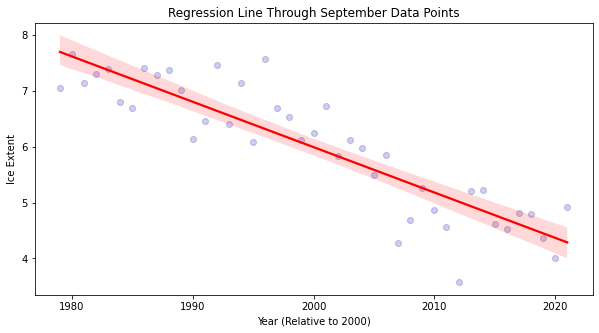

In [6]:
# Create a plot that shows regression line through the September data points
sep_regression_line = plt.rcParams["figure.figsize"] = (10, 5)
sep_regression_line = sns.regplot(x = "year", y = "extent",
                                  scatter_kws = {"color":"blue", "alpha":0.2, "edgecolor":"black"},
                                  line_kws = {"color":"red"},
                                  data = sep_ice)
sep_regression_line.set_xlabel("Year (Relative to 2000)")
sep_regression_line.set_ylabel("Ice Extent")
sep_regression_line.set_title("Regression Line Through September Data Points")
plt.show()

Based on the plot, there appears to be a negative relationship between year and ice extent. That means that as the year increases, the ice extent decreases. There are no apparent outliers. I do not see a clear trend that is getting faster/slower.

    7. (8pt) Based on your linear prediction: when will your trend line hit 0 and we will have BOE?
    Note: such predictions are highly speculative as we ignore the physical reality of the polar regions.
    Note 2: your figure tells when will the trend reach zero. The first BOE will probably happen 10-20 years earlier as the yearly extent jumps up and down around the trend.

Based on my linear regression model, I should find when the line hit 0 by using the formula ice extent = 5.9935 - 0.0812 * year. After solving the equation, 0 = 5.9935 - 0.0812 * year, I get a year of 73.8116. Since this is relative to the year 2000, this means that the trend line will hit 0 at the year 2073.8116 (sometime between 2073 and 2074). However, based on the note, it is possible that the BOE will happen sometime between 2053-2063.

    8. (8pt) Repeat these calculations for March—the month of the yearly maximum. When will the Arctic be completely ice free (if the current trends continue)?

In [7]:
# Create a copy to avoid warning
mar_ice = mar_ice.copy()
# Create the years to make them relative to 2000
mar_ice['relative_year'] = mar_ice.year - 2000
# Estimate a linear regression model for March data
regression_mar = smf.ols("extent ~ relative_year", data = mar_ice).fit()
print(regression_mar.summary())

                            OLS Regression Results                            
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           8.96e-16
Time:                        18:52:40   Log-Likelihood:                -1.3365
No. Observations:                  43   AIC:                             6.673
Df Residuals:                      41   BIC:                             10.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.2570      0.039    391.380

Based on my linear regression model, I should find when the line hit 0 by using the formula ice extent = 15.2570 - 0.0398 * year. After solving the equation, 0 = 15.2570 - 0.0398 * year, I get a year of 383.342. Since this is relative to the year 2000, this means that the trend line will hit 0 at year 2383.342 (sometime between 2383 and 2384). However, based on the note, it is possible that the BOE will happen sometime between 2363-2373 if the current trend continues.

# How Is Basketball Game Score Calculated? (45pt)

    1. (2pt) Load the data (harden-18-19.csv). Do basic sanity checks.

In [8]:
# Load the dataset
harden_df = pd.read_csv('/home/jovyan/PS/data/harden-18-19.csv', sep=',')
# Sanity check
print('Number of rows in the dataset:', harden_df.shape[0])
print('Number of columns in the dataset:', harden_df.shape[1])
harden_df.head(5)

Number of rows in the dataset: 82
Number of columns in the dataset: 30


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


    2. (2pt) How many games did James Harden play in the 2018-2019 season?
    Note: the data also includes games where he did not play.

In [9]:
# Create a dataframe that has only the rows where Harden played games
attended_games = harden_df[~harden_df.G.isna()]
# Count the number of games Harden played in 2018-2019 season
num_games = len(attended_games)
print('James Harden played', num_games, 'games in the 2018-2019 season.')

James Harden played 78 games in the 2018-2019 season.


    3. (4pt) Clean the data and ensure the relevant variables are of numeric type so we can use those in the regression models. It is your task to find what is wrong with the data in its present form (it is downloaded directly from basketball-reference.com), and fix these issues.
    Hint: a good way to transform text to number is pd.to_numeric.

In [10]:
# Check the number of NA values in each column
df_nulls = attended_games.isna().sum() # Only FT% has one null
attended_games = attended_games.copy()
# Variables that interested
columns = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc']
# Covert all the columns to numeric type
attended_games[columns] = attended_games[columns].apply(pd.to_numeric)

    4. (5pt) Analyze the game score GmSc. What is its distribution? Which distribution does the histogram resemble? Range? Mean? Standard deviation?

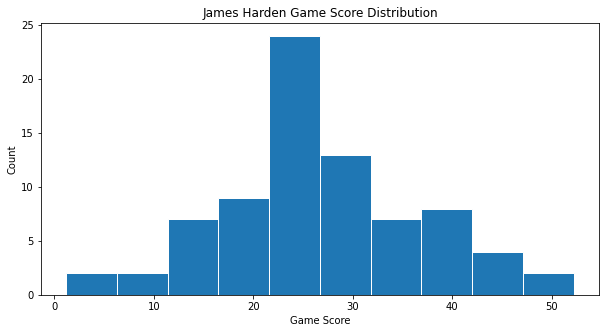

Range:  51.0
Mean:  26.708974358974366
Standard Deviation:  9.989227350031864


In [11]:
# Create a histogram that shows the distribution of the game score
game_score_distribution = plt.rcParams["figure.figsize"] = (10, 5)
game_score_distribution = plt.hist(attended_games['GmSc'], edgecolor = 'w', bins = 10)
game_score_distribution = plt.title('James Harden Game Score Distribution')
game_score_distribution = plt.xlabel('Game Score')
game_score_distribution = plt.ylabel('Count') 
game_score_distribution = plt.show()

# Compute the range, mean, and standard deviation
print('Range: ', (np.max(attended_games.GmSc) - np.min(attended_games.GmSc)))
print("Mean: ", np.mean(attended_games.GmSc))
print("Standard Deviation: ", np.std(attended_games.GmSc))

The distribution of the game score appears to be unimodal, and there is no apparent skew in the histogram. The histogram appears to be normal. However, one node is a lot higher than the other nodes, which indicates that James Harden normally has a game score between 20 to 30.

    5. (6pt) First, let’s run a simple regression model explaining game score GmSc by field goal attempts FGA: 
    GmScg =β0 +β1 ·FGAg +εg
    where gindexes games. (Call this Model 5).
    Display the results and answer the following questions:
        (a) What is the interpretation of Intercept (β0)?
        (b) What is the interpretation of FGA (β1)? Is it statistically significant?

In [12]:
# Create a simple regression model of the game score by field goal attempts
simple_regression = smf.ols("GmSc ~ FGA", data = attended_games).fit()
# Print the summary of the model
print(simple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           0.000433
Time:                        18:52:41   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5963      4.240      2.735      0.0

(a) The intercept $\beta_0$ in the model is 11.5963. This means that when there is 0 field goal attempt, there are 11.5963 game scores. This can be meaningful. The only situation when Harden can have an 11.5963 game score while making 0 field goal attempts is when he got fouled and did not make the basket. Although it is a rare situation, it is not impossible. Thus, the intercept does have a meaningful interpretation.

(b) The slope $\beta_1$ (FGA) is 0.6175. This means that for every field goal attempt, the game score will increase by 0.6175. The p-value for $\beta_1$ is 0.000, which is smaller than the typical alpha value (i.e., 0.05), which means that it is statistically significant.

    6. (12pt) Next, let’s analyse how is game score related to field goals (FG) and field goal attempts (FGA). Estimate the model
    GmScg =β0 +β1 ·FGg +β2 ·FGAg +εg.
    (Call this Model 6).
    If done correctly, you should see results approximately 6.9, 3.4, -0.7.
    Answer the following questions:
    (a) What is the interpretation of FG? Is it statistically significant? 
    (b) What is the interpretation of FGA (β2)? Is it statistically significant?
    (c) How do you explain the fact that model 5 shows positive and model 6 shows a negative estimate for FGA? There is a very easy an intuitive explanation that everyone will understand. Can you figure out what it is?
    (d) What is the R2 of the model? How does it compare to the model 5? What do you conclude from this comparison?

In [13]:
# Create a game score model with factors FG and FGA
GmScg_model = smf.ols("GmSc ~ FG + FGA", data = attended_games).fit()
# Print summary result
print(GmScg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.33e-14
Time:                        18:52:41   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8608      3.075      2.231      0.0

(a) The FG coefficient is 6.8608. This means that for every field goal made, the game score will increase by 3.4082. The p-value for FG is 0.000, which is smaller than the typical alpha value (i.e., 0.05), which means that it is statistically significant.

(b) The FGA coefficient is -0.6940. This means that for every field goal attempt, the game score will decrease by 0.6940. The p-value for FGA is 0.001, which is smaller than the typical alpha value (i.e., 0.05), which means that it is statistically significant.

(c) The reason why model 5 shows positive and model 6 shows a negative estimate for FGA is that there are multiple explanatory variables that will affect the game score. Thus, they will not have as much influence as they would have done when there is only one factor. For example, in this model, we have both FG and FGA, but for model 5, we only have FGA. Thus, the FGA has a smaller effect in model 6 than in model 5. Also,  given the same number of goals, one more attempt will lower the score by 0.7. This means that Harden is attempting more but still getting the same number of goals. Hence we can interpret it as the effect of a missed attempt.

(d) $R^2$ for model 5 is 0.151 and the $R^2$ for model 6 is 0.573. Compared to model 5, the $R^2$ for model 6 is bigger and thus better. I can conclude that there is a stronger correlation between the multiple explanatory variables and the game score than just FGA and the game score.

    7. (9pt) Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results.
    Answer the following questions:
    (a) How do standard errors and t-values look like in this model?
    (b) What is R2 of this model? What does it tell you about how game score is calculated?
    (c) What do the results tell about turnover (TOV)? Is it good or bad for the team?
    Suggestion: check out patsy Q() quoting to include non-valid variable names.

In [14]:
# Create a copy of the dataset to avoid warning
attended_games = attended_games.copy()
# Create a model with all the independent numerial variables
all_variables_model = smf.ols("GmSc ~ FG + FGA + Q('3P') + Q('3PA') + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF", data = attended_games).fit()
# Print the summary table
print(all_variables_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.972e+28
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:52:41   Log-Likelihood:                 2237.8
No. Observations:                  78   AIC:                            -4448.
Df Residuals:                      64   BIC:                            -4415.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.553e-15   6.57e-14     -0.054      0.9

(a) The standard errors in this model are all very close to 0. The t values in this model are very big in magnitude (except for intercept and three-point attempts), which can indicate that these values are statistically significantly different from one another.

(b) The $R^2$ in this model is 1.000. This means that the data point matches the regression equation made for these variables perfectly. That means that this model would calculate the game scores of the different games in the dataset. It would calculate the game scores of James Harden in the 2018-2019 season accurately.

(c) The turnover (TOV)'s coefficient is -1.0000 in this mode. This means that for every turnover, the game score will decrease by 1. This is bad for the team because as the game score is an indication of the player's performance. If the performance of Harden goes down, it is not good for the team since he is part of the team. The team should want every single player's game score to be high.

    8. (5pt) Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/game-score/. Did you recover the same formula?

Although there are some differences in the factors used, the formula is about the same as the one shown on the website. For example, the game score formula has 'points' as one of the factors. Although we don't have 'points' in the formula, but that can be calculated by using (Field Goals Made - Three Points Made) * 2 + Three Points Made * 3 + Free Throws Made * 1. Essentially, we have the same formula as the one presented on https://www.nbastuffer.com/analytics101/game-score/.

# Interpret regression results in the literature (10pt)

    1. (3pt) Do those who have a partner have better mental health (as measured by PHQ-9)? Is the effect statistically significant?

The higher the PHQ-9 score, the worse mental health. The coefficient for having a partner is -0.47, and its p-value is 0.150. This means that having a partner improves mental health because it decreases the score. However, since the p-value is 0.150, it means that it is not statistically significant because 0.150 is much higher than the typical accepted alpha values (i.e., 0.05).

    2. (4pt) What is the effect of COVID exposure? Is it improving or worsening mental health? Is the effect statistically significant?

The coefficient if having a COVID-19 exposure is 0.24. This indicates that having a COVID-19 exposure worsens mental health because it increases the PHQ-9 score. The p-value for having a COVID-19 exposure is 0.129, which is still higher than most accepted alpha values (i.e., 0.05). Thus, it is not statistically significant.

    3. (3pt) How is Financial distress related to mental health? Is the effect statistically significant?

The coefficient of financial distress is 2.32, which means that having financial distress worsens mental health because it increases the PHQ-9 score. The p-value of having financial distress is 0.001, which is less than the typical accepted alpha values (i.e., 0.05), which means that the effect is statistically significant.